# 소호인터넷 가입후 6개월 내 조기해지

라이브러리, 데이터 import

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scikitplot as skplt
from sklearn import linear_model
from sklearn import tree
from sklearn.ensemble import (
    GradientBoostingClassifier,
    RandomForestClassifier,
)
from sklearn.metrics import (
    auc,
    classification_report,
    confusion_matrix,
    plot_roc_curve,
    roc_curve,
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import roc_curve, auc, plot_roc_curve

In [2]:
df = pd.read_csv('./lst_6m.csv')

데이터확인

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94223 entries, 0 to 94222
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   entr_no                   68316 non-null  float64
 1   sohotyp_fb                68316 non-null  float64
 2   sohotyp_e                 68316 non-null  float64
 3   sohotyp_a                 68316 non-null  float64
 4   sohotyp_f                 68316 non-null  float64
 5   sohotyp_b                 68316 non-null  float64
 6   sohotyp_p                 68316 non-null  float64
 7   sohotyp_rt                68316 non-null  float64
 8   sohotyp_re                68316 non-null  float64
 9   sohotyp_t                 68316 non-null  float64
 10  sohotyp_c                 68316 non-null  float64
 11  sohotyp_un                68316 non-null  float64
 12  ch_cd                     68316 non-null  float64
 13  ch_bd                     68316 non-null  float64
 14  ch_bc 

In [4]:
df.isna().sum()

entr_no           25907
sohotyp_fb        25907
sohotyp_e         25907
sohotyp_a         25907
sohotyp_f         25907
                  ...  
puar_bld_cnt_4    25907
puar_bld_cnt_5    25907
puar_bld_cnt_6    25907
puar_bld_cnt_7    25907
under_6m          25907
Length: 89, dtype: int64

In [5]:
df=df.dropna()
df=df.drop(columns=['chu_typ_g','chu_typ_e','chu_typ_f'])

In [6]:
df.isna().sum()

entr_no           0
sohotyp_fb        0
sohotyp_e         0
sohotyp_a         0
sohotyp_f         0
                 ..
puar_bld_cnt_4    0
puar_bld_cnt_5    0
puar_bld_cnt_6    0
puar_bld_cnt_7    0
under_6m          0
Length: 86, dtype: int64

In [7]:
df.tail()

,entr_no,sohotyp_fb,sohotyp_e,sohotyp_a,sohotyp_f,sohotyp_b,sohotyp_p,sohotyp_rt,sohotyp_re,sohotyp_t,...,bld_scls_sale_biz_yn,puar_bld_cnt_0,puar_bld_cnt_1,puar_bld_cnt_2,puar_bld_cnt_3,puar_bld_cnt_4,puar_bld_cnt_5,puar_bld_cnt_6,puar_bld_cnt_7,under_6m
68311,5.002220e+11,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
68312,5.002222e+11,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
68313,5.002144e+11,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
68314,5.002183e+11,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68315,5.002202e+11,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68316 entries, 0 to 68315
Data columns (total 86 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   entr_no                   68316 non-null  float64
 1   sohotyp_fb                68316 non-null  float64
 2   sohotyp_e                 68316 non-null  float64
 3   sohotyp_a                 68316 non-null  float64
 4   sohotyp_f                 68316 non-null  float64
 5   sohotyp_b                 68316 non-null  float64
 6   sohotyp_p                 68316 non-null  float64
 7   sohotyp_rt                68316 non-null  float64
 8   sohotyp_re                68316 non-null  float64
 9   sohotyp_t                 68316 non-null  float64
 10  sohotyp_c                 68316 non-null  float64
 11  sohotyp_un                68316 non-null  float64
 12  ch_cd                     68316 non-null  float64
 13  ch_bd                     68316 non-null  float64
 14  ch_bc 

In [9]:
df['entr_no']=df['entr_no'].astype('str')

In [10]:
df.head()

,entr_no,sohotyp_fb,sohotyp_e,sohotyp_a,sohotyp_f,sohotyp_b,sohotyp_p,sohotyp_rt,sohotyp_re,sohotyp_t,...,bld_scls_sale_biz_yn,puar_bld_cnt_0,puar_bld_cnt_1,puar_bld_cnt_2,puar_bld_cnt_3,puar_bld_cnt_4,puar_bld_cnt_5,puar_bld_cnt_6,puar_bld_cnt_7,under_6m
0,500199582766.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,500201973013.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,500194624208.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,500197081072.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,500200198639.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [11]:
df = df.set_index('entr_no')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68316 entries, 500199582766.0 to 500220189377.0
Data columns (total 85 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   sohotyp_fb                68316 non-null  float64
 1   sohotyp_e                 68316 non-null  float64
 2   sohotyp_a                 68316 non-null  float64
 3   sohotyp_f                 68316 non-null  float64
 4   sohotyp_b                 68316 non-null  float64
 5   sohotyp_p                 68316 non-null  float64
 6   sohotyp_rt                68316 non-null  float64
 7   sohotyp_re                68316 non-null  float64
 8   sohotyp_t                 68316 non-null  float64
 9   sohotyp_c                 68316 non-null  float64
 10  sohotyp_un                68316 non-null  float64
 11  ch_cd                     68316 non-null  float64
 12  ch_bd                     68316 non-null  float64
 13  ch_bc                     68316 non-null  fl

In [13]:
df.head()

,sohotyp_fb,sohotyp_e,sohotyp_a,sohotyp_f,sohotyp_b,sohotyp_p,sohotyp_rt,sohotyp_re,sohotyp_t,sohotyp_c,...,bld_scls_sale_biz_yn,puar_bld_cnt_0,puar_bld_cnt_1,puar_bld_cnt_2,puar_bld_cnt_3,puar_bld_cnt_4,puar_bld_cnt_5,puar_bld_cnt_6,puar_bld_cnt_7,under_6m
entr_no,,,,,,,,,,,,,,,,,,,,,
500199582766.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
500201973013.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
500194624208.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
500197081072.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
500200198639.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### 분석용 데이터 준비

under_6m == 1에 맞춰 ==0 을 under sample

In [14]:
df.groupby('under_6m').count()

,sohotyp_fb,sohotyp_e,sohotyp_a,sohotyp_f,sohotyp_b,sohotyp_p,sohotyp_rt,sohotyp_re,sohotyp_t,sohotyp_c,...,bld_scls_rh_yn,bld_scls_sale_biz_yn,puar_bld_cnt_0,puar_bld_cnt_1,puar_bld_cnt_2,puar_bld_cnt_3,puar_bld_cnt_4,puar_bld_cnt_5,puar_bld_cnt_6,puar_bld_cnt_7
under_6m,,,,,,,,,,,,,,,,,,,,,
0.0,67790,67790,67790,67790,67790,67790,67790,67790,67790,67790,...,67790,67790,67790,67790,67790,67790,67790,67790,67790,67790
1.0,526,526,526,526,526,526,526,526,526,526,...,526,526,526,526,526,526,526,526,526,526


In [15]:
df_1 = df[df['under_6m']==1]
df_2 = df[df['under_6m']==0].sample(n = 526)

In [16]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 526 entries, 500193838886.0 to 500215013212.0
Data columns (total 85 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   sohotyp_fb                526 non-null    float64
 1   sohotyp_e                 526 non-null    float64
 2   sohotyp_a                 526 non-null    float64
 3   sohotyp_f                 526 non-null    float64
 4   sohotyp_b                 526 non-null    float64
 5   sohotyp_p                 526 non-null    float64
 6   sohotyp_rt                526 non-null    float64
 7   sohotyp_re                526 non-null    float64
 8   sohotyp_t                 526 non-null    float64
 9   sohotyp_c                 526 non-null    float64
 10  sohotyp_un                526 non-null    float64
 11  ch_cd                     526 non-null    float64
 12  ch_bd                     526 non-null    float64
 13  ch_bc                     526 non-null    floa

In [17]:
df_2.head()

,sohotyp_fb,sohotyp_e,sohotyp_a,sohotyp_f,sohotyp_b,sohotyp_p,sohotyp_rt,sohotyp_re,sohotyp_t,sohotyp_c,...,bld_scls_sale_biz_yn,puar_bld_cnt_0,puar_bld_cnt_1,puar_bld_cnt_2,puar_bld_cnt_3,puar_bld_cnt_4,puar_bld_cnt_5,puar_bld_cnt_6,puar_bld_cnt_7,under_6m
entr_no,,,,,,,,,,,,,,,,,,,,,
500193838886.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
500214537972.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
500214066311.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
500199946009.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
500218374315.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [18]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 526 entries, 500210696658.0 to 500218007597.0
Data columns (total 85 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   sohotyp_fb                526 non-null    float64
 1   sohotyp_e                 526 non-null    float64
 2   sohotyp_a                 526 non-null    float64
 3   sohotyp_f                 526 non-null    float64
 4   sohotyp_b                 526 non-null    float64
 5   sohotyp_p                 526 non-null    float64
 6   sohotyp_rt                526 non-null    float64
 7   sohotyp_re                526 non-null    float64
 8   sohotyp_t                 526 non-null    float64
 9   sohotyp_c                 526 non-null    float64
 10  sohotyp_un                526 non-null    float64
 11  ch_cd                     526 non-null    float64
 12  ch_bd                     526 non-null    float64
 13  ch_bc                     526 non-null    floa

In [19]:
df_1.head()

,sohotyp_fb,sohotyp_e,sohotyp_a,sohotyp_f,sohotyp_b,sohotyp_p,sohotyp_rt,sohotyp_re,sohotyp_t,sohotyp_c,...,bld_scls_sale_biz_yn,puar_bld_cnt_0,puar_bld_cnt_1,puar_bld_cnt_2,puar_bld_cnt_3,puar_bld_cnt_4,puar_bld_cnt_5,puar_bld_cnt_6,puar_bld_cnt_7,under_6m
entr_no,,,,,,,,,,,,,,,,,,,,,
500210696658.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
500212479611.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
500214925247.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
500213080007.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
500216476705.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [20]:
dfN = pd.concat([df_1,df_2])
dfN.info()
dfN.groupby('under_6m').count()

<class 'pandas.core.frame.DataFrame'>
Index: 1052 entries, 500210696658.0 to 500215013212.0
Data columns (total 85 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   sohotyp_fb                1052 non-null   float64
 1   sohotyp_e                 1052 non-null   float64
 2   sohotyp_a                 1052 non-null   float64
 3   sohotyp_f                 1052 non-null   float64
 4   sohotyp_b                 1052 non-null   float64
 5   sohotyp_p                 1052 non-null   float64
 6   sohotyp_rt                1052 non-null   float64
 7   sohotyp_re                1052 non-null   float64
 8   sohotyp_t                 1052 non-null   float64
 9   sohotyp_c                 1052 non-null   float64
 10  sohotyp_un                1052 non-null   float64
 11  ch_cd                     1052 non-null   float64
 12  ch_bd                     1052 non-null   float64
 13  ch_bc                     1052 non-null   flo

,sohotyp_fb,sohotyp_e,sohotyp_a,sohotyp_f,sohotyp_b,sohotyp_p,sohotyp_rt,sohotyp_re,sohotyp_t,sohotyp_c,...,bld_scls_rh_yn,bld_scls_sale_biz_yn,puar_bld_cnt_0,puar_bld_cnt_1,puar_bld_cnt_2,puar_bld_cnt_3,puar_bld_cnt_4,puar_bld_cnt_5,puar_bld_cnt_6,puar_bld_cnt_7
under_6m,,,,,,,,,,,,,,,,,,,,,
0.0,526,526,526,526,526,526,526,526,526,526,...,526,526,526,526,526,526,526,526,526,526
1.0,526,526,526,526,526,526,526,526,526,526,...,526,526,526,526,526,526,526,526,526,526


#### 데이터프레임을 바로 sklearn train_test_split을 이용하여 train/test 세트 쪼개기
여기서 각 X_train, X_test, y_train, y_test은 데이터프레임 형태로 출력

In [21]:
X_train, X_test, y_train, y_test = train_test_split(dfN.drop('under_6m', axis=1), dfN['under_6m'], test_size = 0.5, random_state=1)

## Logic Regression (basline_using all)

In [22]:
reg = linear_model.LogisticRegression()

In [23]:
reg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
reg.intercept_

array([-0.29488859])

In [25]:
for i, j in zip(list(dfN), reg.coef_[0]):
    print('feature: ' + str(i) + '    coef: '+ str(j))
print('Prediction Accuracy: ', reg.score(X = X_test, y = y_test))
print(classification_report(y_test, reg.predict(X_test)))
reg.predict_proba(X_test)
conf_matrix = pd.DataFrame(
    confusion_matrix(y_test, reg.predict(X_test)).T,
    index=['Predicted Type 0', 'Predicted  Type 1'],
    columns=['True Type 0', 'True Type 1']
)
conf_matrix

feature: sohotyp_fb    coef: 0.17105888088342708
feature: sohotyp_e    coef: 0.5009951213697207
feature: sohotyp_a    coef: -0.2589862490797349
feature: sohotyp_f    coef: 0.11080663018286858
feature: sohotyp_b    coef: 0.2843713219411253
feature: sohotyp_p    coef: -0.03936918702184449
feature: sohotyp_rt    coef: -0.34109137192831296
feature: sohotyp_re    coef: -0.07196840578323506
feature: sohotyp_t    coef: -0.07467311330749352
feature: sohotyp_c    coef: -0.0913168534606866
feature: sohotyp_un    coef: 0.0
feature: ch_cd    coef: 0.05563214428293531
feature: ch_bd    coef: 0.31222697468122423
feature: ch_bc    coef: -0.16828675196906268
feature: ch_cc    coef: -0.4603771309617016
feature: entr_q1    coef: -0.8551472899915014
feature: entr_q2    coef: -0.8692493467222283
feature: entr_q3    coef: 0.6774211321814451
feature: entr_q4    coef: 0.7861707405656152
feature: entr_1m    coef: 0.5499307099538482
feature: entr_2m    coef: -0.3658357018057438
feature: entr_3m    coef: -1.039

,True Type 0,True Type 1
Predicted Type 0,220,38
Predicted Type 1,42,226


ROC AUC: 0.85


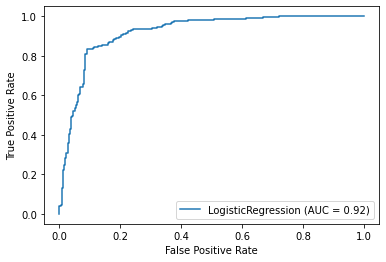

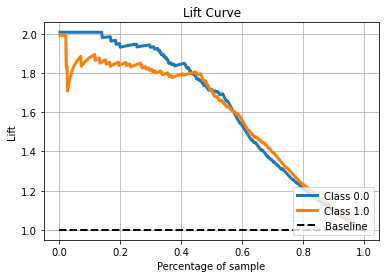

In [26]:
fpr, tpr, _ = roc_curve(y_test, reg.predict(X = X_test))
roc_auc = auc(fpr, tpr)
print ('ROC AUC: %0.2f' % roc_auc)
plot_roc_curve(reg, X_test, y_test)
y_probas = reg.predict_proba(X_test)
skplt.metrics.plot_lift_curve(y_test, y_probas)
plt.show()

## Decision Tree

In [48]:
dt = tree.DecisionTreeClassifier(min_impurity_decrease=0.01)
dt = dt.fit(X_train, y_train)

In [65]:
for i, j in zip(list(dfN.drop('under_6m', axis=1)), dt.feature_importances_):
    print('feature: '+ str(i) + '    importance: '+ str(j))
print('Prediction Accuracy: ', dt.score(X = X_test, y = y_test))
conf_matrix = pd.DataFrame(
    confusion_matrix(y_test, dt.predict(X_test)).T,
    index=['Predicted Type 0', 'Predicted  Type 1'],
    columns=['True Type 0', 'True Type 1']
)
conf_matrix

feature: sohotyp_fb    importance: 0.0
feature: sohotyp_e    importance: 0.0
feature: sohotyp_a    importance: 0.0
feature: sohotyp_f    importance: 0.0
feature: sohotyp_b    importance: 0.0
feature: sohotyp_p    importance: 0.0
feature: sohotyp_rt    importance: 0.0
feature: sohotyp_re    importance: 0.0
feature: sohotyp_t    importance: 0.0
feature: sohotyp_c    importance: 0.0
feature: sohotyp_un    importance: 0.0
feature: ch_cd    importance: 0.0
feature: ch_bd    importance: 0.0
feature: ch_bc    importance: 0.0
feature: ch_cc    importance: 0.0
feature: entr_q1    importance: 0.09505117676168862
feature: entr_q2    importance: 0.0
feature: entr_q3    importance: 0.0
feature: entr_q4    importance: 0.0
feature: entr_1m    importance: 0.0
feature: entr_2m    importance: 0.0
feature: entr_3m    importance: 0.0
feature: entr_4m    importance: 0.0
feature: entr_5m    importance: 0.05813621979697471
feature: entr_6m    importance: 0.0
feature: entr_7m    importance: 0.0
feature: entr_

,True Type 0,True Type 1
Predicted Type 0,224,45
Predicted Type 1,38,219


              precision    recall  f1-score   support

         0.0       0.83      0.85      0.84       262
         1.0       0.85      0.83      0.84       264

    accuracy                           0.84       526
   macro avg       0.84      0.84      0.84       526
weighted avg       0.84      0.84      0.84       526

ROC AUC: 0.84


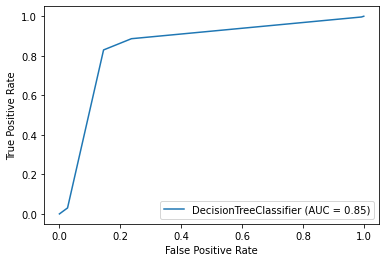

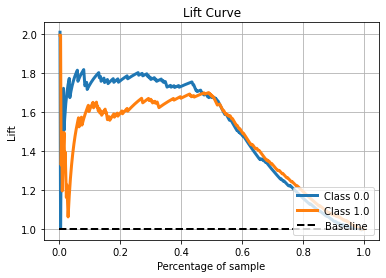

In [50]:
print(classification_report(y_test, dt.predict(X_test)))
fpr, tpr, _ = roc_curve(y_test, dt.predict(X = X_test))
roc_auc = auc(fpr, tpr)
print ('ROC AUC: %0.2f' % roc_auc)
plot_roc_curve(dt, X_test, y_test)
y_probas = dt.predict_proba(X_test)
skplt.metrics.plot_lift_curve(y_test, y_probas)
plt.show()

### RF 수행

In [30]:
rf = RandomForestClassifier(n_estimators=1000, min_impurity_decrease=0.001)
rf = rf.fit(X_train, y_train)

In [66]:
for i, j in zip(list(dfN), rf.feature_importances_):
    print('feature: '+ str(i) + '    importance: '+ str(j))
print('Prediction Accuracy: ', rf.score(X = X_test, y = y_test))
print(classification_report(y_test, rf.predict(X_test)))
conf_matrix = pd.DataFrame(
    confusion_matrix(y_test, rf.predict(X_test)).T,
    index=['Predicted Type 0', 'Predicted  Type 1'],
    columns=['True Type 0', 'True Type 1']
)
conf_matrix


feature: sohotyp_fb    importance: 0.007674366052663163
feature: sohotyp_e    importance: 0.015608195640840143
feature: sohotyp_a    importance: 0.004074250359306635
feature: sohotyp_f    importance: 0.0027986546439900824
feature: sohotyp_b    importance: 0.002776574027380631
feature: sohotyp_p    importance: 0.000449604787747958
feature: sohotyp_rt    importance: 0.005490774144454393
feature: sohotyp_re    importance: 0.002214903825743711
feature: sohotyp_t    importance: 0.0004801125809352294
feature: sohotyp_c    importance: 0.0007040074937403862
feature: sohotyp_un    importance: 0.0
feature: ch_cd    importance: 0.008832638162309645
feature: ch_bd    importance: 0.013247386409901123
feature: ch_bc    importance: 0.007230289475692877
feature: ch_cc    importance: 0.007305107090295071
feature: entr_q1    importance: 0.04308908388468728
feature: entr_q2    importance: 0.02541043721239979
feature: entr_q3    importance: 0.021933294922454175
feature: entr_q4    importance: 0.0252176504

,True Type 0,True Type 1
Predicted Type 0,229,33
Predicted Type 1,33,231


ROC AUC: 0.87


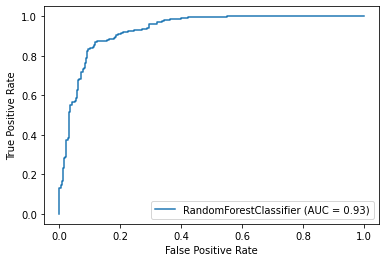

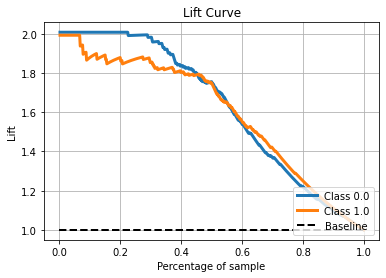

In [32]:
fpr, tpr, _ = roc_curve(y_test, rf.predict(X = X_test))
roc_auc = auc(fpr, tpr)
print ('ROC AUC: %0.2f' % roc_auc)
plot_roc_curve(rf, X_test, y_test)
y_probas = rf.predict_proba(X_test)
skplt.metrics.plot_lift_curve(y_test, y_probas)
plt.show()

### GBT

In [33]:
gbt = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
gbt = gbt.fit(X_train, y_train)

In [67]:
for i, j in zip(list(dfN), gbt.feature_importances_):
    print('feature: '+ str(i) + '    importance: '+ str(j))
print('Prediction Accuracy: ', gbt.score(X = X_test, y = y_test))
print(classification_report(y_test, gbt.predict(X_test)))
conf_matrix = pd.DataFrame(
    confusion_matrix(y_test, gbt.predict(X_test)).T,
    index=['Predicted Type 0', 'Predicted  Type 1'],
    columns=['True Type 0', 'True Type 1']
)
conf_matrix


feature: sohotyp_fb    importance: 0.0012444221756266504
feature: sohotyp_e    importance: 0.014961717761620297
feature: sohotyp_a    importance: 0.0051923393418571665
feature: sohotyp_f    importance: 0.0010974731010039427
feature: sohotyp_b    importance: 0.003455827783999712
feature: sohotyp_p    importance: 0.0
feature: sohotyp_rt    importance: 0.0041666562655094325
feature: sohotyp_re    importance: 0.0
feature: sohotyp_t    importance: 0.0
feature: sohotyp_c    importance: 0.0
feature: sohotyp_un    importance: 0.0
feature: ch_cd    importance: 0.0018114899583222884
feature: ch_bd    importance: 0.013582164528139757
feature: ch_bc    importance: 0.0006664896551935502
feature: ch_cc    importance: 0.008969468579866894
feature: entr_q1    importance: 0.05869362315217413
feature: entr_q2    importance: 0.015348517270526713
feature: entr_q3    importance: 0.01441935683975617
feature: entr_q4    importance: 0.00965764864496528
feature: entr_1m    importance: 0.006121646776950495
feat

,True Type 0,True Type 1
Predicted Type 0,220,34
Predicted Type 1,42,230


ROC AUC: 0.86


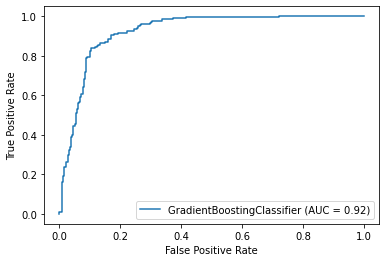

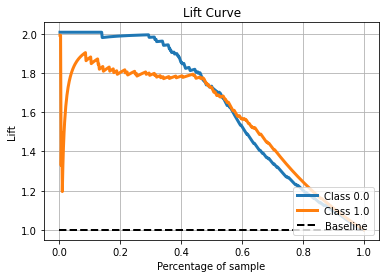

In [35]:
fpr, tpr, _ = roc_curve(y_test, gbt.predict(X = X_test))
roc_auc = auc(fpr, tpr)
print ('ROC AUC: %0.2f' % roc_auc)
plot_roc_curve(gbt, X_test, y_test)
y_probas = gbt.predict_proba(X_test)
skplt.metrics.plot_lift_curve(y_test, y_probas)
plt.show()

## RF을 통해 확인된 변수 중요도 바탕으로 Logic Regression 확정

In [51]:
dfLog = dfN.loc[:,['int_only','cnt_070','cnt_iptv','entr_q1','bld_grnd_fcnt','entr_q2','entr_q4','entr_q3','cont_pr_3','sohotyp_e','cont_pr_0','cnt_int','ch_bd','cnt_cctv','entr_mon','svc_100','svc_500','cust_kd_id','entr_thu','cust_kd_biz','ch_cd','ccw_si','puar_bld_cnt_5','puar_bld_cnt_6','entr_wed','entr_fri','puar_bld_cnt_7','cnt_etc','bld_scls_apt_yn','sohotyp_fb','ccw_gu','bldusg_biz','ch_cc','puar_bld_cnt_3','ch_bc','svc_1G','bldusg_res','puar_bld_cnt_4','entr_tue','puar_bld_cnt_2','sohotyp_rt','bldusg_etc','sohotyp_a','flo03_blw_mcls_commcl_yn','bld_scls_sale_biz_yn','svc_lte','sohotyp_f','sohotyp_b','sohotyp_re','flo03_blw_mcls_job_yn','bld_scls_c1nlf_yn','ccw_gun','entr_sat','cont_pr_1','puar_bld_cnt_1','bldusg_pub','bld_scls_fnnc_yn','sohotyp_c','sohotyp_t','sohotyp_p','bld_scls_instt_yn','puar_bld_cnt_0','bld_scls_hspt_yn','bld_scls_rh_yn','flo03_blw_mcls_mnhs_yn','under_6m']]

In [52]:
dfLog.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1052 entries, 500210696658.0 to 500215013212.0
Data columns (total 66 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   int_only                  1052 non-null   float64
 1   cnt_070                   1052 non-null   float64
 2   cnt_iptv                  1052 non-null   float64
 3   entr_q1                   1052 non-null   float64
 4   bld_grnd_fcnt             1052 non-null   float64
 5   entr_q2                   1052 non-null   float64
 6   entr_q4                   1052 non-null   float64
 7   entr_q3                   1052 non-null   float64
 8   cont_pr_3                 1052 non-null   float64
 9   sohotyp_e                 1052 non-null   float64
 10  cont_pr_0                 1052 non-null   float64
 11  cnt_int                   1052 non-null   float64
 12  ch_bd                     1052 non-null   float64
 13  cnt_cctv                  1052 non-null   flo

In [53]:
dfLog.head()

,int_only,cnt_070,cnt_iptv,entr_q1,bld_grnd_fcnt,entr_q2,entr_q4,entr_q3,cont_pr_3,sohotyp_e,...,bld_scls_fnnc_yn,sohotyp_c,sohotyp_t,sohotyp_p,bld_scls_instt_yn,puar_bld_cnt_0,bld_scls_hspt_yn,bld_scls_rh_yn,flo03_blw_mcls_mnhs_yn,under_6m
entr_no,,,,,,,,,,,,,,,,,,,,,
500210696658.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
500212479611.0,1.0,0.0,0.0,0.0,12.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
500214925247.0,1.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
500213080007.0,1.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
500216476705.0,1.0,0.0,0.0,0.0,15.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [54]:
X2 = dfN[list(dfN)[:-1]].values
y2 = dfN['under_6m'].values

In [60]:
X2_train, X2_test, y2_train, y2_test = train_test_split(dfLog.drop('under_6m', axis=1), dfLog['under_6m'], test_size = 0.5, random_state=1)

In [61]:
regF = linear_model.LogisticRegression()

In [62]:
regF.fit(X2_train, y2_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [63]:
for i, j in zip(list(dfLog), reg.coef_[0]):
    print('feature:' + str(i) + '    coef: '+ str(j))

feature:int_only    coef: 0.17105888088342708
feature:cnt_070    coef: 0.5009951213697207
feature:cnt_iptv    coef: -0.2589862490797349
feature:entr_q1    coef: 0.11080663018286858
feature:bld_grnd_fcnt    coef: 0.2843713219411253
feature:entr_q2    coef: -0.03936918702184449
feature:entr_q4    coef: -0.34109137192831296
feature:entr_q3    coef: -0.07196840578323506
feature:cont_pr_3    coef: -0.07467311330749352
feature:sohotyp_e    coef: -0.0913168534606866
feature:cont_pr_0    coef: 0.0
feature:cnt_int    coef: 0.05563214428293531
feature:ch_bd    coef: 0.31222697468122423
feature:cnt_cctv    coef: -0.16828675196906268
feature:entr_mon    coef: -0.4603771309617016
feature:svc_100    coef: -0.8551472899915014
feature:svc_500    coef: -0.8692493467222283
feature:cust_kd_id    coef: 0.6774211321814451
feature:entr_thu    coef: 0.7861707405656152
feature:cust_kd_biz    coef: 0.5499307099538482
feature:ch_cd    coef: -0.3658357018057438
feature:ccw_si    coef: -1.0392422981396212
feature

In [64]:
print('Prediction Accuracy: ', regF.score(X = X2_test, y = y2_test))
print(classification_report(y2_test, regF.predict(X2_test)))
regF.predict_proba(X2_test)
conf_matrix = pd.DataFrame(
    confusion_matrix(y2_test, regF.predict(X2_test)).T,
    index=['Predicted Type 0', 'Predicted  Type 1'],
    columns=['True Type 0', 'True Type 1']
)
conf_matrix

Prediction Accuracy:  0.8479087452471483
              precision    recall  f1-score   support

         0.0       0.85      0.84      0.85       262
         1.0       0.85      0.85      0.85       264

    accuracy                           0.85       526
   macro avg       0.85      0.85      0.85       526
weighted avg       0.85      0.85      0.85       526



,True Type 0,True Type 1
Predicted Type 0,221,39
Predicted Type 1,41,225
